<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/Strength_of_Markov%2C_Chebyshev_and_Chernoff_bounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov, Chebyshev, Chernoff (Error Analysis)

Here we see the difference between actual probability distribution and the one formed by taking monte carlo of Markov, Chebyshev and Chernoff bounds and analyse both of them so see which is the most accurate

# Experiment (Binomial Distribution)
We simulate a coin toss, 10 toss and 10000 samplings

And then use Monte Carlo data to plot Empirical distribution of P(X>x), where we iterate small x, means X>1, X>2,...,X>10

And then we plot the sample probability derived from Markov, Chebyshev and Chernoff bounds to analyse the differences and accuracy in each case

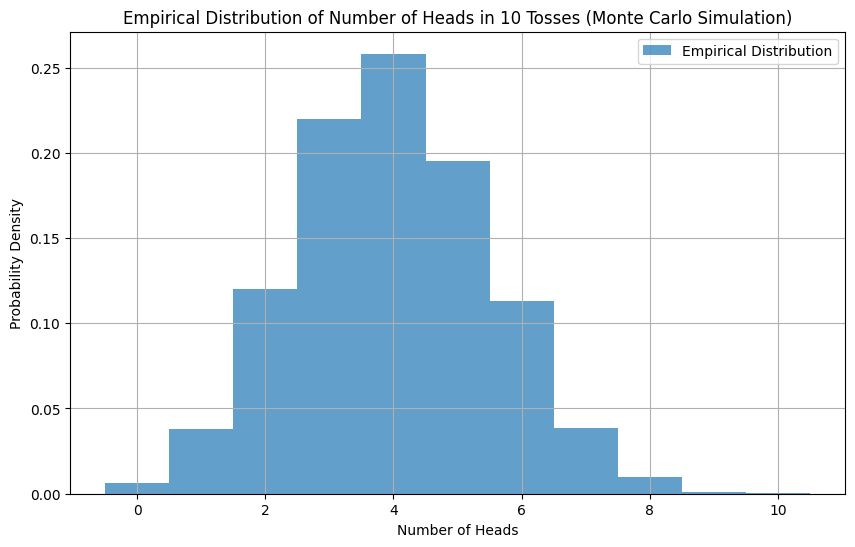

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Probability of getting heads
p_heads = 0.40

# Number of coin tosses in each experiment (e.g., simulating 10 tosses per experiment)
num_tosses_per_experiment = 10

# Number of Monte Carlo simulations (e.g., running the experiment 10000 times)
num_simulations = 10000

# Simulate the coin tosses
# 0 represents tails, 1 represents heads
results = np.random.choice([0, 1], size=(num_simulations, num_tosses_per_experiment), p=[1 - p_heads, p_heads])

# Calculate the number of heads in each simulation
num_heads = np.sum(results, axis=1)

# Plot the empirical distribution of the number of heads
plt.figure(figsize=(10, 6))
plt.hist(num_heads, bins=np.arange(0, num_tosses_per_experiment + 2) - 0.5, density=True, alpha=0.7, label='Empirical Distribution')
plt.xlabel('Number of Heads')
plt.ylabel('Probability Density')
plt.title('Empirical Distribution of Number of Heads in 10 Tosses (Monte Carlo Simulation)')
plt.grid(True)
plt.legend()
plt.show()

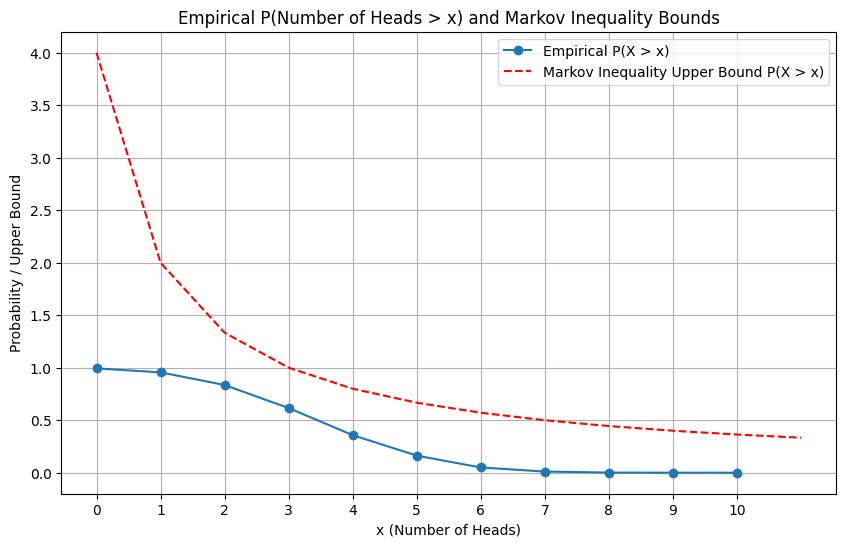

In [3]:
# Calculate the empirical probability of P(X > x) from the simulation results

# Get the counts of each number of heads
counts, bins = np.histogram(num_heads, bins=np.arange(0, num_tosses_per_experiment + 2) - 0.5)

# Calculate the total number of simulations
total_simulations = num_simulations

# Calculate the empirical probability for each number of heads
empirical_prob = counts / total_simulations

# Calculate the empirical probability P(X > x)
# This is the cumulative sum of probabilities from right to left
empirical_prob_greater_than_x = np.zeros_like(x_values_markov, dtype=float)

for i in range(len(x_values_markov)):
    # For a given x, P(X > x) is the sum of probabilities for values > x
    # Since x_values_markov goes from 0 to 10, we look at indices from x+1 onwards
    if i < len(empirical_prob):
        empirical_prob_greater_than_x[i] = np.sum(empirical_prob[i+1:])

# Plot the empirical probability P(X > x)
plt.figure(figsize=(10, 6))
plt.plot(x_values_markov, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)')

# Plot Markov bounds again for comparison
plt.plot(x_values_plot, markov_bounds_plot, label='Markov Inequality Upper Bound P(X > x)', color='red', linestyle='--')


plt.xlabel('x (Number of Heads)')
plt.ylabel('Probability / Upper Bound')
plt.title('Empirical P(Number of Heads > x) and Markov Inequality Bounds')
plt.xticks(np.arange(0, num_tosses_per_experiment + 1))
plt.grid(True)
plt.legend()
plt.show()

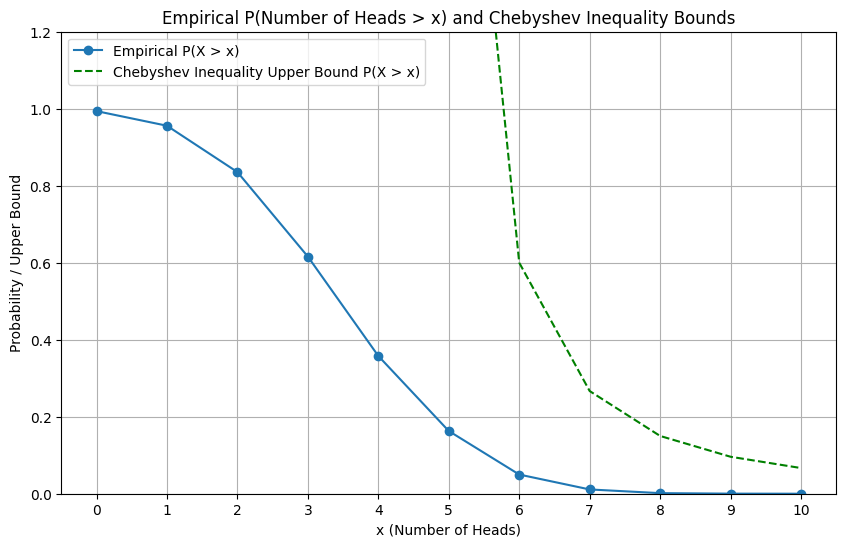

In [4]:
# Calculate the expected number of heads (already calculated as expected_heads)
# Calculate the variance of the number of heads for a binomial distribution
# Variance = n * p * (1 - p)
variance_heads = num_tosses_per_experiment * p_heads * (1 - p_heads)

# Chebyshev's inequality gives a bound for P(|X - E[X]| >= k) <= Var(X) / k^2
# We want a bound for P(X > x).
# P(X > x) can be related to P(X - E[X] > x - E[X]).
# If x > E[X], then P(X > x) <= P(|X - E[X]| >= x - E[X]).
# So, for x > E[X], P(X > x) <= Var(X) / (x - E[X])^2

# Create an array for x values for Chebyshev's inequality
# We are interested in x values where P(X > x) is non-zero empirically, and also values > expected_heads
x_values_chebyshev = np.arange(int(np.floor(expected_heads)), num_tosses_per_experiment + 1)

# Calculate Chebyshev bounds for P(X > x) for x > E[X]
chebyshev_bounds = np.zeros_like(x_values_chebyshev, dtype=float)

for i, x in enumerate(x_values_chebyshev):
    if x >= expected_heads:
        k = x - expected_heads
        if k > 0:
            chebyshev_bounds[i] = variance_heads / (k**2)
        else:
             # For x = E[X], P(X > E[X]) using Chebyshev requires a slightly different approach
             # P(X > E[X]) can be bounded by P(|X - E[X]| >= epsilon) for small epsilon
             # However, a simpler approach for integer variables is to use P(X >= E[X] + 1)
             # P(X >= E[X] + 1) <= Var(X) / (E[X] + 1 - E[X])^2 = Var(X) / 1^2 = Var(X)
             # Let's stick to x > E[X] for the basic application of the inequality form used.
             # Alternatively, we can calculate P(X > x) as 1 - P(X <= x).
             # P(X <= x) = P(X - E[X] <= x - E[X]). If x < E[X], this is P(E[X] - X >= E[X] - x)
             # P(|X - E[X]| >= k) = P(X - E[X] >= k) + P(X - E[X] <= -k)
             # P(X >= E[X] + k) + P(X <= E[X] - k) <= Var(X) / k^2
             # We are interested in P(X > x). If x >= E[X], then P(X > x) <= P(|X - E[X]| >= x - E[X])
             # If x < E[X], P(X > x) is the area to the right of x.

             # A common way to use Chebyshev for P(X > x) is to bound P(X >= x) for x > E[X]
             # P(X >= x) = P(X - E[X] >= x - E[X]). Let k = x - E[X].
             # P(X - E[X] >= k) <= P(|X - E[X]| >= k) <= Var(X) / k^2 for k > 0
             # For integer values, P(X > x) = P(X >= x + 1). If x + 1 > E[X], then
             # P(X > x) <= Var(X) / (x + 1 - E[X])^2

             # Let's calculate the bound for P(X > x) for integer x, using the form:
             # P(X > x) <= Var(X) / (x + 1 - E[X])^2 for x + 1 > E[X]
             # and P(X > x) <= 1 if x + 1 <= E[X] (as probability cannot exceed 1)

             if x + 1 > expected_heads:
                 k_prime = x + 1 - expected_heads
                 chebyshev_bounds[i] = variance_heads / (k_prime**2)
             else:
                 chebyshev_bounds[i] = 1.0


# Plot both the empirical P(X > x) and the Chebyshev bounds
plt.figure(figsize=(10, 6))

# Plot empirical P(X > x) (reusing the previously calculated array)
# Ensure x_values_markov and empirical_prob_greater_than_x are available from previous cells
# If not, recalculate them here.
# Assuming they are available:
if 'empirical_prob_greater_than_x' in locals() and 'x_values_markov' in locals():
    plt.plot(x_values_markov, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)')
else:
    # Recalculate if necessary
    counts, bins = np.histogram(num_heads, bins=np.arange(0, num_tosses_per_experiment + 2) - 0.5)
    total_simulations = num_simulations
    empirical_prob = counts / total_simulations
    x_values_markov = np.arange(0, num_tosses_per_experiment + 1)
    empirical_prob_greater_than_x = np.zeros_like(x_values_markov, dtype=float)
    for i in range(len(x_values_markov)):
        if i < len(empirical_prob):
            empirical_prob_greater_than_x[i] = np.sum(empirical_prob[i+1:])
    plt.plot(x_values_markov, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)')


# Plot Chebyshev bounds
# Need to align chebyshev_bounds with appropriate x values for plotting
# x_values_chebyshev corresponds to the x in P(X > x) <= Bound
plt.plot(x_values_chebyshev, chebyshev_bounds, label="Chebyshev Inequality Upper Bound P(X > x)", color='green', linestyle='--')

plt.xlabel('x (Number of Heads)')
plt.ylabel('Probability / Upper Bound')
plt.title('Empirical P(Number of Heads > x) and Chebyshev Inequality Bounds')
plt.xticks(np.arange(0, num_tosses_per_experiment + 1))
plt.grid(True)
plt.ylim(0, 1.2) # Limit y-axis for better visualization of probabilities
plt.legend()
plt.show()

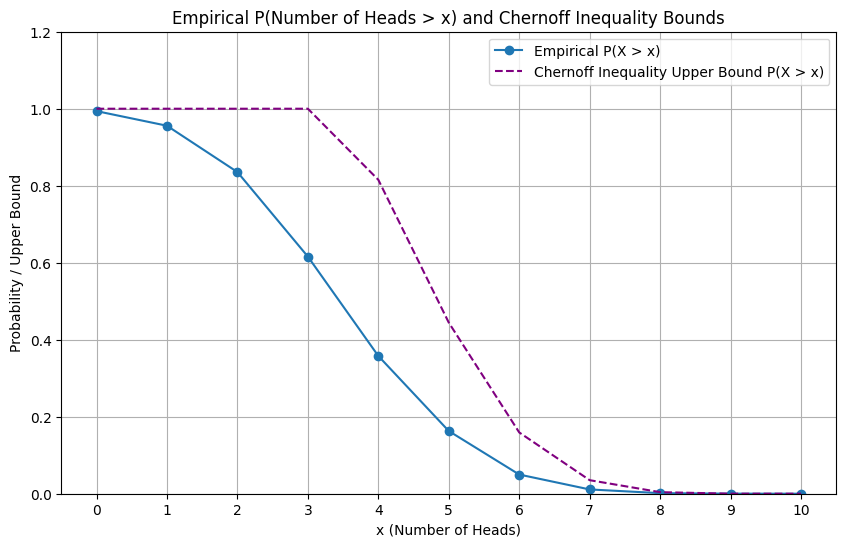

In [6]:
# Calculate the Chernoff bound for the sum of independent Bernoulli random variables
# For a sum of n independent Bernoulli(p) random variables (number of heads in n tosses),
# the Chernoff bound for P(S_n > x) is given by exp(-n * I(x/n)), where I(a) is the rate function.
# For Bernoulli variables, I(a) = a * log(a/p) + (1 - a) * log((1 - a) / (1 - p)) for a in (p, 1]
# and I(a) = 0 for a <= p.
# This bound is for P(S_n >= x). For P(S_n > x), we can use P(S_n >= x + 1).
# We need to be careful with the range of x/n. It must be between 0 and 1.

# Create an array for x values for the Chernoff bound
# We are interested in x values where P(X > x) is non-zero empirically
x_values_chernoff = np.arange(0, num_tosses_per_experiment + 1)

# Calculate Chernoff bounds for P(X > x) = P(X >= x + 1)
chernoff_bounds = np.zeros_like(x_values_chernoff, dtype=float)

for i, x in enumerate(x_values_chernoff):
    a = (x + 1) / num_tosses_per_experiment  # This is the value for S_n / n

    if a > p_heads and a <= 1:
        # Calculate the rate function I(a)
        # Handle edge cases for logarithms when a or (1-a) is close to 0 or 1
        term1 = 0.0
        if a > 0 and p_heads > 0:
            term1 = a * np.log(a / p_heads)

        term2 = 0.0
        if (1 - a) > 0 and (1 - p_heads) > 0:
            term2 = (1 - a) * np.log((1 - a) / (1 - p_heads))

        I_a = term1 + term2

        # Calculate the Chernoff bound P(S_n >= x + 1) <= exp(-n * I(a))
        chernoff_bounds[i] = np.exp(-num_tosses_per_experiment * I_a)

    elif a <= p_heads:
        # If x + 1 <= expected_heads, the Chernoff bound is often 1 (not useful)
        # For a <= p, the rate function I(a) is typically 0, leading to a bound of exp(0) = 1.
        # We can set the bound to 1 in this case, as probability cannot exceed 1.
        chernoff_bounds[i] = 1.0
    else: # a > 1, which should not happen given the range of x_values_chernoff
        chernoff_bounds[i] = 0.0 # Probability is 0 if x+1 > num_tosses_per_experiment


# Plot both the empirical P(X > x) and the Chernoff bounds
plt.figure(figsize=(10, 6))

# Plot empirical P(X > x) (reusing the previously calculated array)
# Ensure x_values_markov and empirical_prob_greater_than_x are available from previous cells
# Assuming they are available:
if 'empirical_prob_greater_than_x' in locals() and 'x_values_markov' in locals():
    plt.plot(x_values_markov, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)')
else:
    # Recalculate if necessary
    counts, bins = np.histogram(num_heads, bins=np.arange(0, num_tosses_per_experiment + 2) - 0.5)
    total_simulations = num_simulations
    empirical_prob = counts / total_simulations
    x_values_markov = np.arange(0, num_tosses_per_experiment + 1)
    empirical_prob_greater_than_x = np.zeros_like(x_values_markov, dtype=float)
    for i in range(len(x_values_markov)):
        if i < len(empirical_prob):
            empirical_prob_greater_than_x[i] = np.sum(empirical_prob[i+1:])
    plt.plot(x_values_markov, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)')


# Plot Chernoff bounds
# Need to align chernoff_bounds with appropriate x values for plotting
# x_values_chernoff corresponds to the x in P(X > x) <= Bound
plt.plot(x_values_chernoff, chernoff_bounds, label="Chernoff Inequality Upper Bound P(X > x)", color='purple', linestyle='--')

plt.xlabel('x (Number of Heads)')
plt.ylabel('Probability / Upper Bound')
plt.title('Empirical P(Number of Heads > x) and Chernoff Inequality Bounds')
plt.xticks(np.arange(0, num_tosses_per_experiment + 1))
plt.grid(True)
plt.ylim(0, 1.2) # Limit y-axis for better visualization of probabilities
plt.legend()
plt.show()

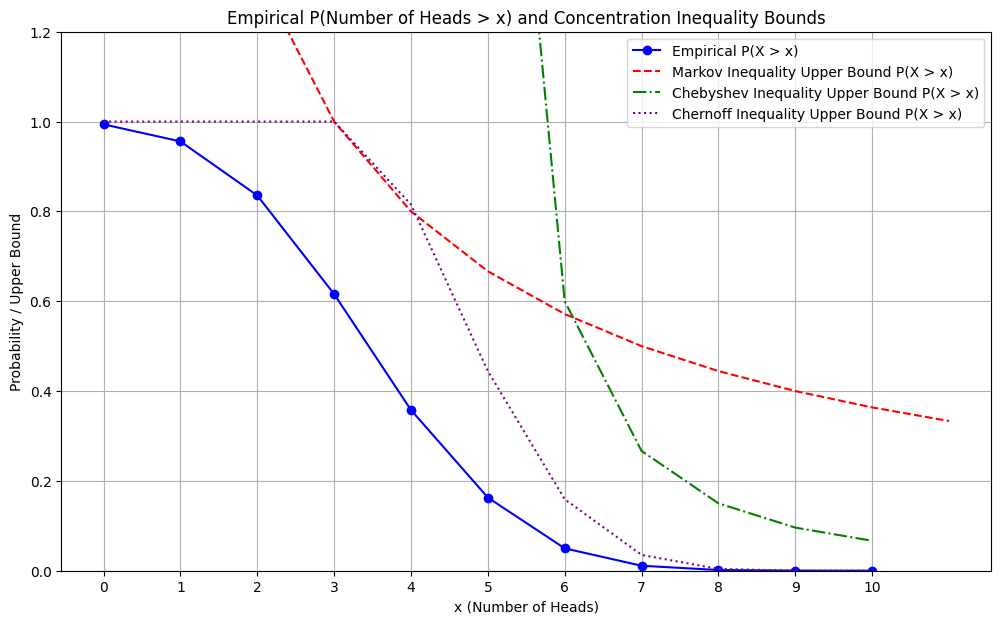

In [7]:
# Ensure necessary variables are available (from previous cells)
# num_heads, num_tosses_per_experiment, p_heads, num_simulations
# expected_heads, variance_heads
# x_values_markov, empirical_prob_greater_than_x
# x_values_chebyshev, chebyshev_bounds
# x_values_chernoff, chernoff_bounds

# Recalculate empirical P(X > x) if necessary
if 'empirical_prob_greater_than_x' not in locals() or 'x_values_markov' not in locals():
    counts, bins = np.histogram(num_heads, bins=np.arange(0, num_tosses_per_experiment + 2) - 0.5)
    total_simulations = num_simulations
    empirical_prob = counts / total_simulations
    x_values_markov = np.arange(0, num_tosses_per_experiment + 1)
    empirical_prob_greater_than_x = np.zeros_like(x_values_markov, dtype=float)
    for i in range(len(x_values_markov)):
        if i < len(empirical_prob):
            empirical_prob_greater_than_x[i] = np.sum(empirical_prob[i+1:])

# Recalculate Markov bounds if necessary
if 'markov_bounds_plot' not in locals() or 'x_values_plot' not in locals():
    expected_heads = num_tosses_per_experiment * p_heads
    x_values_plot = np.arange(0, num_tosses_per_experiment + 2)
    markov_bounds_plot = expected_heads / (x_values_plot + 1)

# Recalculate Chebyshev bounds if necessary
if 'chebyshev_bounds' not in locals() or 'x_values_chebyshev' not in locals():
    expected_heads = num_tosses_per_experiment * p_heads
    variance_heads = num_tosses_per_experiment * p_heads * (1 - p_heads)
    x_values_chebyshev = np.arange(int(np.floor(expected_heads)), num_tosses_per_experiment + 1)
    chebyshev_bounds = np.zeros_like(x_values_chebyshev, dtype=float)
    for i, x in enumerate(x_values_chebyshev):
        if x + 1 > expected_heads:
            k_prime = x + 1 - expected_heads
            chebyshev_bounds[i] = variance_heads / (k_prime**2)
        else:
            chebyshev_bounds[i] = 1.0

# Recalculate Chernoff bounds if necessary
if 'chernoff_bounds' not in locals() or 'x_values_chernoff' not in locals():
    x_values_chernoff = np.arange(0, num_tosses_per_experiment + 1)
    chernoff_bounds = np.zeros_like(x_values_chernoff, dtype=float)
    expected_heads = num_tosses_per_experiment * p_heads # Ensure expected_heads is defined

    for i, x in enumerate(x_values_chernoff):
        a = (x + 1) / num_tosses_per_experiment
        if a > p_heads and a <= 1:
            term1 = 0.0
            if a > 0 and p_heads > 0:
                term1 = a * np.log(a / p_heads)
            term2 = 0.0
            if (1 - a) > 0 and (1 - p_heads) > 0:
                term2 = (1 - a) * np.log((1 - a) / (1 - p_heads))
            I_a = term1 + term2
            chernoff_bounds[i] = np.exp(-num_tosses_per_experiment * I_a)
        elif a <= p_heads:
            chernoff_bounds[i] = 1.0
        else:
            chernoff_bounds[i] = 0.0


# Plot all bounds on a single graph
plt.figure(figsize=(12, 7))

# Plot empirical P(X > x)
plt.plot(x_values_markov, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)', color='blue')

# Plot Markov bounds
plt.plot(x_values_plot, markov_bounds_plot, label='Markov Inequality Upper Bound P(X > x)', color='red', linestyle='--')

# Plot Chebyshev bounds
# Align x_values_chebyshev with the empirical plot's x_values for consistent plotting
plt.plot(x_values_chebyshev, chebyshev_bounds, label="Chebyshev Inequality Upper Bound P(X > x)", color='green', linestyle='-.')

# Plot Chernoff bounds
# Align x_values_chernoff with the empirical plot's x_values for consistent plotting
plt.plot(x_values_chernoff, chernoff_bounds, label="Chernoff Inequality Upper Bound P(X > x)", color='purple', linestyle=':')


plt.xlabel('x (Number of Heads)')
plt.ylabel('Probability / Upper Bound')
plt.title('Empirical P(Number of Heads > x) and Concentration Inequality Bounds')
plt.xticks(np.arange(0, num_tosses_per_experiment + 1))
plt.grid(True)
plt.ylim(0, 1.2) # Limit y-axis for better visualization of probabilities
plt.legend()
plt.show()

We might think that Chebyshev is the worst bound but in reality tightness is as follows; Markov>Chebyshev>Chernoff

Chebyshev's inequality generally provides tighter bounds than Markov's inequality, and this improvement is particularly noticeable for values of 'x' that are further away from the mean, here the no of coin toss is just 10 that's why experiment samples are not large enough to observe this

Markov's inequality only uses the mean, while Chebyshev's uses both the mean and the variance, incorporating more information about the spread of the distribution. This additional information allows Chebyshev's to give a better estimate of the probability of deviation from the mean compared to Markov's

To see the bug picture, we redo the experiment, 100 coin toss instead of 10, and 1 lakh samplings for more accuracy and see the result

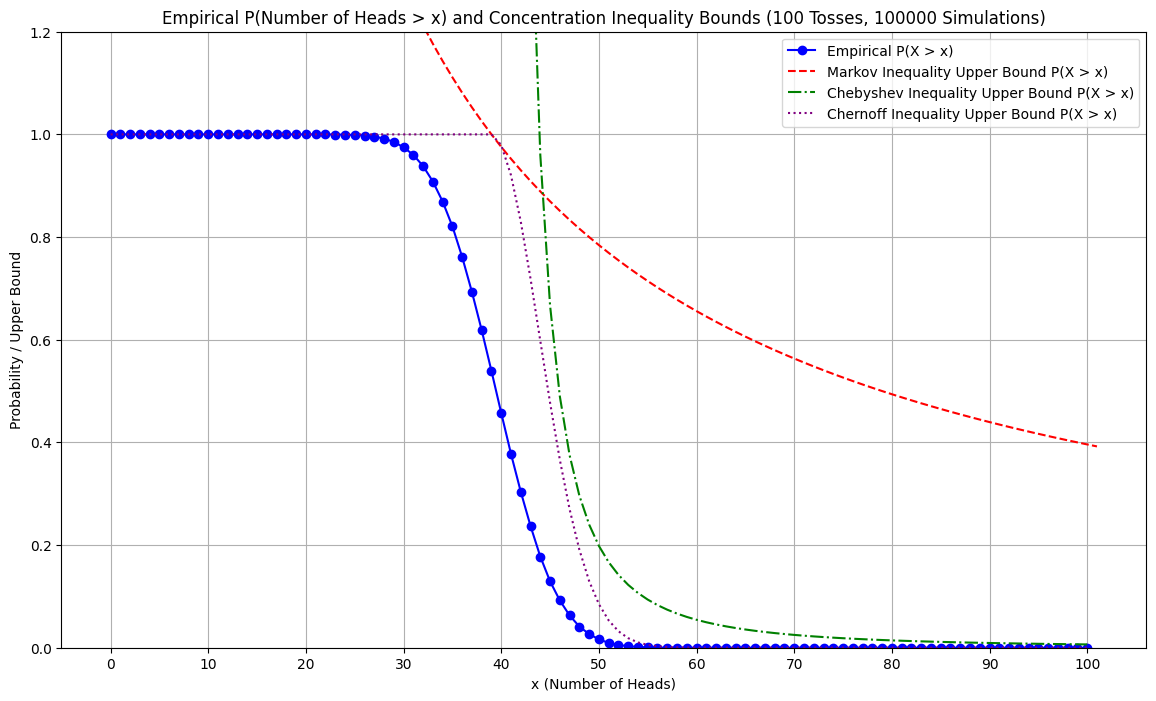

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Updated parameters
p_heads = 0.40
num_tosses_per_experiment = 100  # Increased number of coin tosses
num_simulations = 100000      # Increased number of Monte Carlo simulations

# Simulate the coin tosses with updated parameters
results = np.random.choice([0, 1], size=(num_simulations, num_tosses_per_experiment), p=[1 - p_heads, p_heads])
num_heads = np.sum(results, axis=1)

# Calculate empirical P(X > x)
counts, bins = np.histogram(num_heads, bins=np.arange(0, num_tosses_per_experiment + 2) - 0.5)
total_simulations = num_simulations
empirical_prob = counts / total_simulations
x_values_empirical = np.arange(0, num_tosses_per_experiment + 1)
empirical_prob_greater_than_x = np.zeros_like(x_values_empirical, dtype=float)
for i in range(len(x_values_empirical)):
    if i < len(empirical_prob):
        empirical_prob_greater_than_x[i] = np.sum(empirical_prob[i+1:])

# Calculate Markov bounds
expected_heads = num_tosses_per_experiment * p_heads
x_values_markov = np.arange(0, num_tosses_per_experiment + 2)
markov_bounds = expected_heads / (x_values_markov + 1)

# Calculate Chebyshev bounds
variance_heads = num_tosses_per_experiment * p_heads * (1 - p_heads)
x_values_chebyshev = np.arange(int(np.floor(expected_heads)), num_tosses_per_experiment + 1)
chebyshev_bounds = np.zeros_like(x_values_chebyshev, dtype=float)
for i, x in enumerate(x_values_chebyshev):
    if x + 1 > expected_heads:
        k_prime = x + 1 - expected_heads
        if k_prime > 0: # Ensure k_prime is positive to avoid division by zero
            chebyshev_bounds[i] = variance_heads / (k_prime**2)
        else:
             chebyshev_bounds[i] = 1.0 # Or handle appropriately, for x + 1 = expected_heads
    else:
        chebyshev_bounds[i] = 1.0

# Calculate Chernoff bounds
x_values_chernoff = np.arange(0, num_tosses_per_experiment + 1)
chernoff_bounds = np.zeros_like(x_values_chernoff, dtype=float)
for i, x in enumerate(x_values_chernoff):
    a = (x + 1) / num_tosses_per_experiment
    if a > p_heads and a <= 1:
        term1 = 0.0
        if a > 0 and p_heads > 0:
            term1 = a * np.log(a / p_heads)
        term2 = 0.0
        if (1 - a) > 0 and (1 - p_heads) > 0:
            term2 = (1 - a) * np.log((1 - a) / (1 - p_heads))
        I_a = term1 + term2
        chernoff_bounds[i] = np.exp(-num_tosses_per_experiment * I_a)
    elif a <= p_heads:
        chernoff_bounds[i] = 1.0
    else:
        chernoff_bounds[i] = 0.0

# Plot all bounds on a single graph
plt.figure(figsize=(14, 8))

# Plot empirical P(X > x)
plt.plot(x_values_empirical, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)', color='blue')

# Plot Markov bounds
plt.plot(x_values_markov, markov_bounds, label='Markov Inequality Upper Bound P(X > x)', color='red', linestyle='--')

# Plot Chebyshev bounds
plt.plot(x_values_chebyshev, chebyshev_bounds, label="Chebyshev Inequality Upper Bound P(X > x)", color='green', linestyle='-.')

# Plot Chernoff bounds
plt.plot(x_values_chernoff, chernoff_bounds, label="Chernoff Inequality Upper Bound P(X > x)", color='purple', linestyle=':')

plt.xlabel('x (Number of Heads)')
plt.ylabel('Probability / Upper Bound')
plt.title('Empirical P(Number of Heads > x) and Concentration Inequality Bounds (100 Tosses, 100000 Simulations)')
plt.xticks(np.arange(0, num_tosses_per_experiment + 1)) # Reverted x-ticks
plt.grid(True)
plt.ylim(0, 1.2)
plt.legend()
plt.show()

Clearly Chebyshev proved to be better than Markov this time, now let's increase coin toss from 100 to 10000 and see the magic

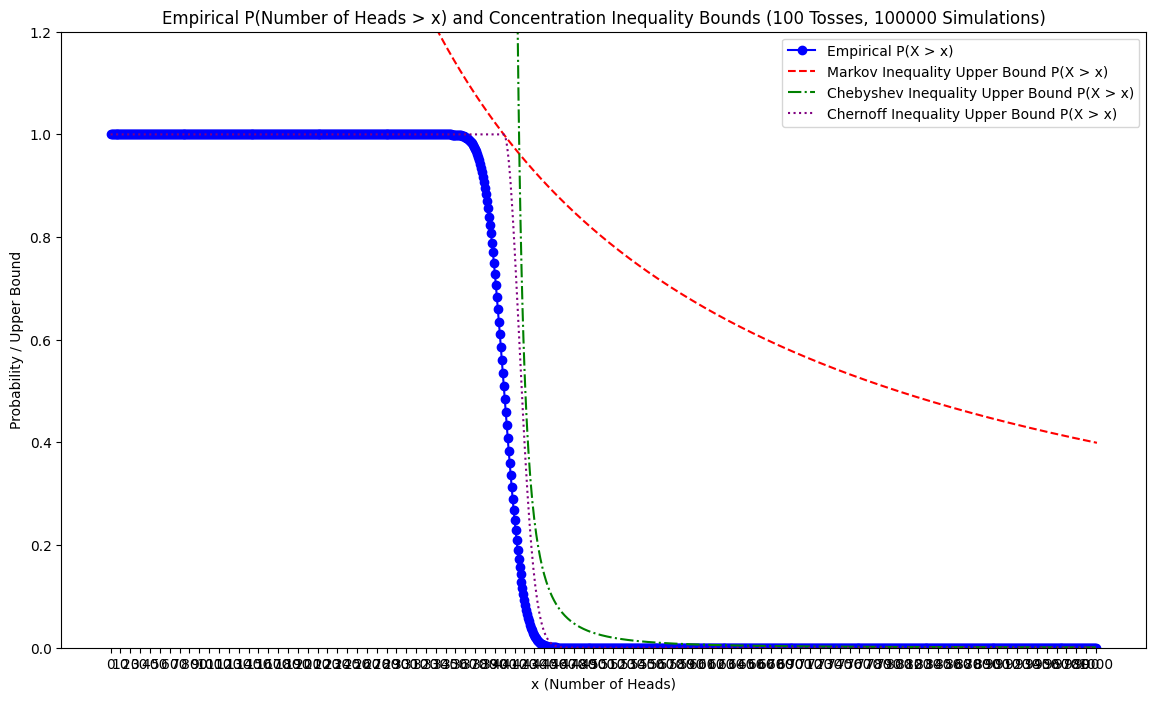

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Updated parameters
p_heads = 0.40
num_tosses_per_experiment = 1000  # Increased number of coin tosses
num_simulations = 100000      # Increased number of Monte Carlo simulations

# Simulate the coin tosses with updated parameters
results = np.random.choice([0, 1], size=(num_simulations, num_tosses_per_experiment), p=[1 - p_heads, p_heads])
num_heads = np.sum(results, axis=1)

# Calculate empirical P(X > x)
counts, bins = np.histogram(num_heads, bins=np.arange(0, num_tosses_per_experiment + 2) - 0.5)
total_simulations = num_simulations
empirical_prob = counts / total_simulations
x_values_empirical = np.arange(0, num_tosses_per_experiment + 1)
empirical_prob_greater_than_x = np.zeros_like(x_values_empirical, dtype=float)
for i in range(len(x_values_empirical)):
    if i < len(empirical_prob):
        empirical_prob_greater_than_x[i] = np.sum(empirical_prob[i+1:])

# Calculate Markov bounds
expected_heads = num_tosses_per_experiment * p_heads
x_values_markov = np.arange(0, num_tosses_per_experiment + 2)
markov_bounds = expected_heads / (x_values_markov + 1)

# Calculate Chebyshev bounds
variance_heads = num_tosses_per_experiment * p_heads * (1 - p_heads)
x_values_chebyshev = np.arange(int(np.floor(expected_heads)), num_tosses_per_experiment + 1)
chebyshev_bounds = np.zeros_like(x_values_chebyshev, dtype=float)
for i, x in enumerate(x_values_chebyshev):
    if x + 1 > expected_heads:
        k_prime = x + 1 - expected_heads
        if k_prime > 0: # Ensure k_prime is positive to avoid division by zero
            chebyshev_bounds[i] = variance_heads / (k_prime**2)
        else:
             chebyshev_bounds[i] = 1.0 # Or handle appropriately, for x + 1 = expected_heads
    else:
        chebyshev_bounds[i] = 1.0

# Calculate Chernoff bounds
x_values_chernoff = np.arange(0, num_tosses_per_experiment + 1)
chernoff_bounds = np.zeros_like(x_values_chernoff, dtype=float)
for i, x in enumerate(x_values_chernoff):
    a = (x + 1) / num_tosses_per_experiment
    if a > p_heads and a <= 1:
        term1 = 0.0
        if a > 0 and p_heads > 0:
            term1 = a * np.log(a / p_heads)
        term2 = 0.0
        if (1 - a) > 0 and (1 - p_heads) > 0:
            term2 = (1 - a) * np.log((1 - a) / (1 - p_heads))
        I_a = term1 + term2
        chernoff_bounds[i] = np.exp(-num_tosses_per_experiment * I_a)
    elif a <= p_heads:
        chernoff_bounds[i] = 1.0
    else:
        chernoff_bounds[i] = 0.0

# Plot all bounds on a single graph
plt.figure(figsize=(14, 8))

# Plot empirical P(X > x)
plt.plot(x_values_empirical, empirical_prob_greater_than_x, marker='o', linestyle='-', label='Empirical P(X > x)', color='blue')

# Plot Markov bounds
plt.plot(x_values_markov, markov_bounds, label='Markov Inequality Upper Bound P(X > x)', color='red', linestyle='--')

# Plot Chebyshev bounds
plt.plot(x_values_chebyshev, chebyshev_bounds, label="Chebyshev Inequality Upper Bound P(X > x)", color='green', linestyle='-.')

# Plot Chernoff bounds
plt.plot(x_values_chernoff, chernoff_bounds, label="Chernoff Inequality Upper Bound P(X > x)", color='purple', linestyle=':')

plt.xlabel('x (Number of Heads)')
plt.ylabel('Probability / Upper Bound')
plt.title('Empirical P(Number of Heads > x) and Concentration Inequality Bounds (100 Tosses, 100000 Simulations)')
plt.xticks(np.arange(0, num_tosses_per_experiment + 1, 10)) # Adjust x-ticks for better readability
plt.grid(False)
plt.ylim(0, 1.2)
plt.legend()
plt.show()




*   Chebyshev and Chernoff are very close around the mean of the distribution
*   Markov is way too lose compared to both the bounds
*   Chebyshev is tight around right side but not at the left side, maybe because this random variable doesn't take negative values




**But when to use which bound, is there any type of distribution on which a particular bound performs best**



---





# Probability Bounds for Random Variables

This section describes three key probability bounds: Markov's Inequality, Chebyshev's Inequality, and Chernoff Bounds. Each provides a way to estimate tail probabilities, with varying requirements and tightness.

## Markov's Inequality

Markov's Inequality applies to any non-negative random variable $X$ with a known mean $\mathbb{E}[X] = \mu$. It states:

$$ P(X \geq k\mu) \leq \frac{1}{k}, \quad \text{for } k > 1 $$

### Requirements
- $X \geq 0$
- Mean $\mu$ is known

### Characteristics
- Uses minimal information, often resulting in the loosest bounds.
- Less effective for distributions with thin tails (where probabilities of extreme values drop off rapidly).

### Use Cases
- Useful when little is known about the distribution.
- Suitable for establishing a basic bound.

## Chebyshev's Inequality

Chebyshev's Inequality uses both the mean $\mu$ and variance $\sigma^2$ of a random variable $X$. It bounds the probability of deviations from the mean:

$$ P(|X - \mu| \geq k\sigma) \leq \frac{1}{k^2}, \quad \text{for } k > 0 $$

For one-sided bounds:

$$ P(X \geq k\sigma + \mu) \leq \frac{1}{k^2}, \quad \text{for } k > 0 $$

### Requirements
- Known mean $\mu$ and variance $\sigma^2$.

### Characteristics
- Provides tighter bounds than Markov's when variance indicates data spread well.
- Less effective for distributions with heavy tails (where extreme values have higher probabilities).

### Use Cases
- Applicable when mean $\mu$ and variance $\sigma^2$ are known but the distribution is complex or unknown.

## Chernoff Bounds

Chernoff Bounds are effective for bounding tail probabilities, especially for sums of independent random variables (e.g., binomial distributions as sums of Bernoulli trials). They leverage the moment generating function to capture the distribution's shape.

### Characteristics
- Tighter than Markov's and Chebyshev's bounds in the tails for many distributions, including:
  - **Gaussian (Normal) Distribution**: Particularly tight bounds.
  - **Poisson Distribution**: Effective for deviations from the mean number of events.
  - **Other Sub-Gaussian Distributions**: Tails decay at least as fast as a Gaussian.

### Use Cases
- Ideal for sums of independent variables with detailed distributional information.